<a href="https://colab.research.google.com/github/zachfreitas/ADS_504_Machine_Learning/blob/main/Module_4/Assignment_4/Zachariah_Freitas_Assignment_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4.1
Zachariah Freitas


In [ ]:
# Module_4/Assignment_4/Zachariah_Freitas_Assignment_4_1.ipynb

In [2]:
# Import Libraries
###############################################################
# I/O
import os
# Turn off warnings to make results look cleaner.
import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")
###############################################################
# Data Structure
import numpy as np # Matrix, Arrays, and vector operations.
from numpy import nan # Value for missing data
import pandas as pd # Datafram operations
import json
###############################################################
# Graphics
%matplotlib inline
import matplotlib.pyplot as plt # Simple Plotting
import matplotlib.pylab as pylab
import matplotlib.gridspec as gs
import seaborn as sns; sns.set()
###############################################################
# Test / Train Splits
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score # Calc Cross Validation Score.
from sklearn.model_selection import GridSearchCV # Building a Grid Search for Hyperparamter Optimization
###############################################################
# Feature libraries
# Category Data
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder # Category Feature Creation
from sklearn.preprocessing import OrdinalEncoder # 
from sklearn.feature_extraction import DictVectorizer # Category Feature Creation
from sklearn.feature_extraction import FeatureHasher # Category Feature Creation
###############################################################
# Text Data
from sklearn.feature_extraction.text import CountVectorizer # Count Term - Text Feature Creation
from sklearn.feature_extraction.text import TfidfVectorizer # Term frequency-inverse document frequency (TF–IDF) - Text Feature Creation
###############################################################
# Numeric Data
from sklearn.preprocessing import PolynomialFeatures # Create ploynomial expansion of variables
###############################################################
# Data Imputation / Missing Data
# from sklearn.preprocessing import Imputer # Depreciated - Imputation of missing data
from sklearn.impute import SimpleImputer # - Imputation of missing data
###############################################################
# Creating Piplines
from sklearn.pipeline import make_pipeline # Feature Pipelines
###############################################################
# Modeling
# from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LinearRegression
###############################################################
# Model Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
# Loading and Pre-Processing Data:
modcloth_data = pd.read_json('https://github.com/zachfreitas/ADS_504_Machine_Learning/raw/main/Module_4/Assignment_4/modcloth_final_data.zip', lines=True)
modcloth_data

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,NaN,8,4.0,b,NaN,36.0,outerwear,NaN,5ft 8in,Jennifer,just right,fit,727820,8.5,average,Cute jacket!,Cute jacket!
82786,807722,NaN,12,5.0,ddd/f,NaN,34.0,outerwear,NaN,5ft 5in,Kelli,slightly long,small,197040,NaN,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,NaN,12,5.0,dddd/g,36.0,32.0,outerwear,NaN,5ft 4in,elacount,just right,fit,102493,NaN,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,807722,NaN,12,4.0,NaN,NaN,NaN,outerwear,NaN,5ft 3in,jennaklinner,just right,fit,756491,NaN,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...


In [4]:
# Create a variable named ‘labels’ using the ‘quality’ column. 
# These are the labels that we will use for the rest of this assignment.
modcloth_data['labels'] = modcloth_data['quality'] 

## Data Engineering

In [5]:
# this line drops any rows with missing data
cleaned_data = clothing_df.dropna()
# here we grab the data we want from pandas
X_data = cleaned_data[['waist','size','hips','bra size','shoe size']]
y_data = cleaned_data[['OutcomeType']]
enc = OrdinalEncoder()
enc.fit(X_data)
le = preprocessing.LabelEncoder()
le.fit(y_data)
data_categorical = pd.DataFrame(enc.transform(X_data),
columns=list(X_data))
X=data_categorical
y=le.transform(y_data)

NameError: ignored

In [6]:
# Height Transformation

def parse_ht(ht):
  # format: 7ft 7in"
  if pd.isna(ht):
    return ht
  else:
    ht_ = ht.strip().split("ft")
    ft_ = float(ht_[0].strip())
    if len(ht_[1].replace("in","").strip()) < 1:
      in_ = 0
    else: 
      in_ = float(ht_[1].replace("in","").strip())
    return (12*ft_) + in_

modcloth_data['height(inches)'] = modcloth_data['height'].apply(lambda x: parse_ht(x))

In [7]:
# Bust Transformation

# groups.nunique()
# modcloth_data[modcloth_data['bust']=='37-39']
# groups = modcloth_data.groupby(by = ['bust', 'cup size',	'bra size'])

def parse_bust(bust):
  # format: '37-39'"
  if bust == '37-39':
    bust_ = float(38)
  else:
    bust_ = float(bust)
  return bust_

modcloth_data['bust(size)'] = modcloth_data['bust'].apply(lambda x: parse_bust(x))

In [8]:
modcloth_data

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,...,length,fit,user_id,shoe size,shoe width,review_summary,review_text,labels,height(inches),bust(size)
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,...,just right,small,991571,NaN,NaN,NaN,NaN,5.0,66.0,36.0
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,...,just right,small,587883,NaN,NaN,NaN,NaN,3.0,62.0,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,...,slightly long,small,395665,9.0,NaN,NaN,NaN,2.0,67.0,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,...,just right,fit,875643,NaN,NaN,NaN,NaN,5.0,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,...,slightly long,small,944840,NaN,NaN,NaN,NaN,5.0,62.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,NaN,8,4.0,b,NaN,36.0,outerwear,NaN,5ft 8in,...,just right,fit,727820,8.5,average,Cute jacket!,Cute jacket!,4.0,68.0,NaN
82786,807722,NaN,12,5.0,ddd/f,NaN,34.0,outerwear,NaN,5ft 5in,...,slightly long,small,197040,NaN,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...,5.0,65.0,NaN
82787,807722,NaN,12,5.0,dddd/g,36.0,32.0,outerwear,NaN,5ft 4in,...,just right,fit,102493,NaN,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...,5.0,64.0,NaN
82788,807722,NaN,12,4.0,NaN,NaN,NaN,outerwear,NaN,5ft 3in,...,just right,fit,756491,NaN,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...,4.0,63.0,NaN


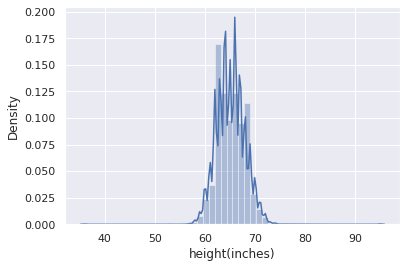

In [10]:
sns.distplot(modcloth_data['height(inches)'])

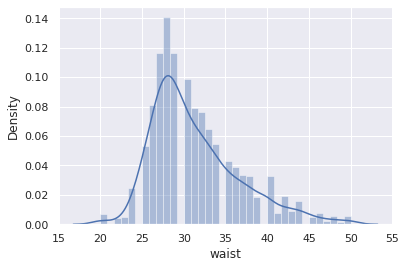

In [12]:
sns.distplot(modcloth_data['waist'])

In [15]:
# Categorical Data for Reviews:
# For these values, ‘cup size’, ‘length’, ‘category’, use OneHotEncoder to convert these to a data frame called cat_feat.

# one-hot encode
ohe = OneHotEncoder(sparse=False).fit(modcloth_data[['cup size', 'length', 'category']])

cat_feat = pd.DataFrame(ohe.transform(modcloth_data[['cup size', 'length', 'category']]), columns=ohe.get_feature_names(['cup size', 'length', 'category']))

cat_feat

,cup size_a,cup size_aa,cup size_b,cup size_c,cup size_d,cup size_dd/e,cup size_ddd/f,cup size_dddd/g,cup size_h,cup size_i,...,length_very long,length_very short,length_nan,category_bottoms,category_dresses,category_new,category_outerwear,category_sale,category_tops,category_wedding
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
82786,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
82787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
82788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Split the dataset using the following line:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50) #, random_state=42)

In [ ]:
# Use make_pipeline to compare these two classifiers:
balanced_model = make_pipeline(,Perceptron(class_weight='balanced'))
unbalanced_model = make_pipeline(,Perceptron())


In [ ]:
# Use metrics.plot_confusion_matrix and metrics.classification_report to report and visualize the
# confusion matrix and results. Perform this for both the balanced and unbalanced models.


Next, you will add in data from the numeric features. Unfortunately, many of these values are
missing: not every JSON object will have a value for this numeric value. You will use imputation
as implemented in https://scikit-learn.org/stable/modules/impute.html to fill in the missing values
before classification: use SimpleImputer.

In [17]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])


imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

Next, you will create three pipelines. Create one pipeline using SimpleImputer to impute the missing values and the balanced perceptron. Next, create a pipeline using preprocessing.Normalizer(). Finally, create a different pipeline using preprocessing.StandardScaler().

For each of the pipeline,l do fivefold cross-validation, using 
`scores = cross_val_score(model, X, y, cv=5,scoring=’accuracy’)` to compute the accuracy of each of the pipelines.

Create a table, with a row (labeled) for each pipeline you created. The table should report the maximum, minimum, and mean of accuracy for each of the pipelines.


Text Data from Reviews:
Finally, you will use the words in the consumer reviews to build a classifier to predict the results.
corpus = modcloth_data['review_text']



Create a new variable from the text data, after removing outliers, which are records that contain
no text data (these will be nans in your data frame). This new variable is a list of strings, where
every string is a consumer review.



Pass this new variable to sklearn’sTfidfVectorizer
(https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) to load
the data. Create a new dataframe called X from the bag of words features, using
pd.DataFrame.sparse.from_spmatrix, and subset the labels to only those which have text data
present.


Next, use feature selection
(https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection) to subset the
text data to only the most relevant features. Be sure to do this based on the training set, then
apply the transformation to the test set. Using the pipeline can make this step easier.


Use SelectKBest and chi-2 to select features. Make sure you have the latest version (at least 0.24 of scikit-learn, or you may get errors). Print a list of the top ten features selected. Hint: Use vectorizer.get_feature_names(), XKBest.fit() and then XNew.get_support(). 

For k in the range [10,25,50,100,250,500,1000,10000], plot the accuracy of the
classifier for each value of k. Your plot should look like the one below.
